In [4]:
!pip install pycaret
from pycaret.datasets import get_data
from pycaret.clustering import *
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [9]:
columns=['sepal_length','sepal_width','petal_length','petal_width','species']
data = pd.read_csv('/content/iris.data',names=columns)

In [10]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
data = data.drop(columns=['species'])

In [12]:
clustering_setup = setup(data)

,Description,Value
0,Session id,6749
1,Original data shape,"(150, 4)"
2,Transformed data shape,"(150, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [14]:
num_clusters = [3, 4, 5]

In [15]:
clustering_algorithms = ['agglomerative', 'gmm', 'birch']


In [16]:
results_dict = {}

In [20]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering, Birch
import pandas as pd



preprocessing_techniques = {
    'None': None,
    'normalize': StandardScaler(),
    'pca': PCA(),
    'transform': None,
    'scale': MinMaxScaler()
}


clustering_algorithms = {
    'agglomerative': AgglomerativeClustering(),
    'gmm': GaussianMixture(),
    'birch': Birch()
}

num_clusters = [3, 4, 5]

results_dict = {}


for algorithm, model in clustering_algorithms.items():
    algorithm_results = pd.DataFrame(index=['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])
    for technique, preprocess_method in preprocessing_techniques.items():
        for n_clusters in num_clusters:
            if preprocess_method is not None:
                preprocessed_data = preprocess_method.fit_transform(data)
            else:
                preprocessed_data = data


            if algorithm == 'agglomerative':
                model = AgglomerativeClustering(n_clusters=n_clusters)
            elif algorithm == 'gmm':
                model = GaussianMixture(n_components=n_clusters)
            elif algorithm == 'birch':
                model = Birch(n_clusters=n_clusters)

            labels = model.fit_predict(preprocessed_data)


            if len(set(labels)) <= 1:
                continue


            silhouette = silhouette_score(preprocessed_data, labels)
            calinski_harabasz = calinski_harabasz_score(preprocessed_data, labels)
            davies_bouldin = davies_bouldin_score(preprocessed_data, labels)

            col_name = f'{technique}_c={n_clusters}'
            algorithm_results[col_name] = [silhouette, calinski_harabasz, davies_bouldin]


    results_dict[algorithm] = algorithm_results


In [21]:
results_dict

{'agglomerative':                      None_c=3    None_c=4    None_c=5  normalize_c=3  \
 Silhouette           0.554097    0.488740    0.484155       0.445540   
 Calinski-Harabasz  556.841122  513.772164  487.070341     220.260437   
 Davies-Bouldin       0.656604    0.795602    0.820687       0.805940   
 
                    normalize_c=4  normalize_c=5     pca_c=3     pca_c=4  \
 Silhouette              0.399326       0.354970    0.554097    0.488740   
 Calinski-Harabasz     198.730315     194.961557  556.841122  513.772164   
 Davies-Bouldin          0.981081       0.946529    0.656604    0.795602   
 
                       pca_c=5  transform_c=3  transform_c=4  transform_c=5  \
 Silhouette           0.484155       0.554097       0.488740       0.484155   
 Calinski-Harabasz  487.070341     556.841122     513.772164     487.070341   
 Davies-Bouldin       0.820687       0.656604       0.795602       0.820687   
 
                     scale_c=3   scale_c=4   scale_c=5  
 Silhoue

In [22]:
for algorithm, results in results_dict.items():
    results.to_csv(f'{algorithm}_results.csv')

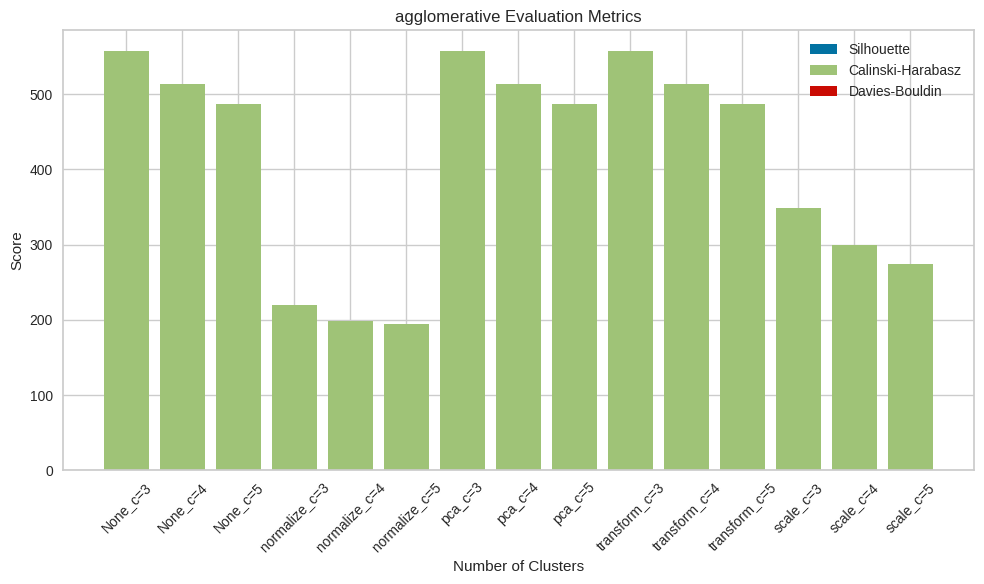

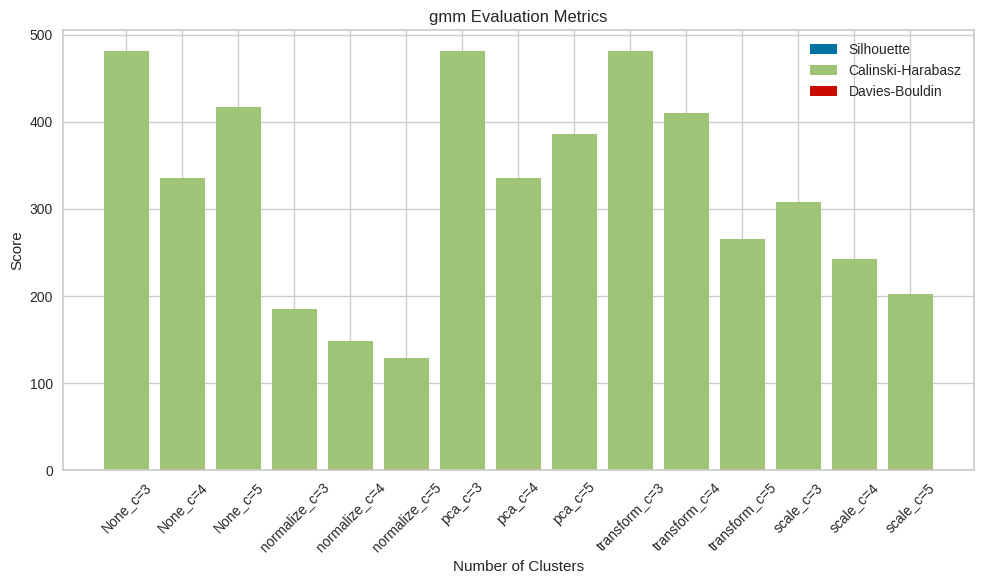

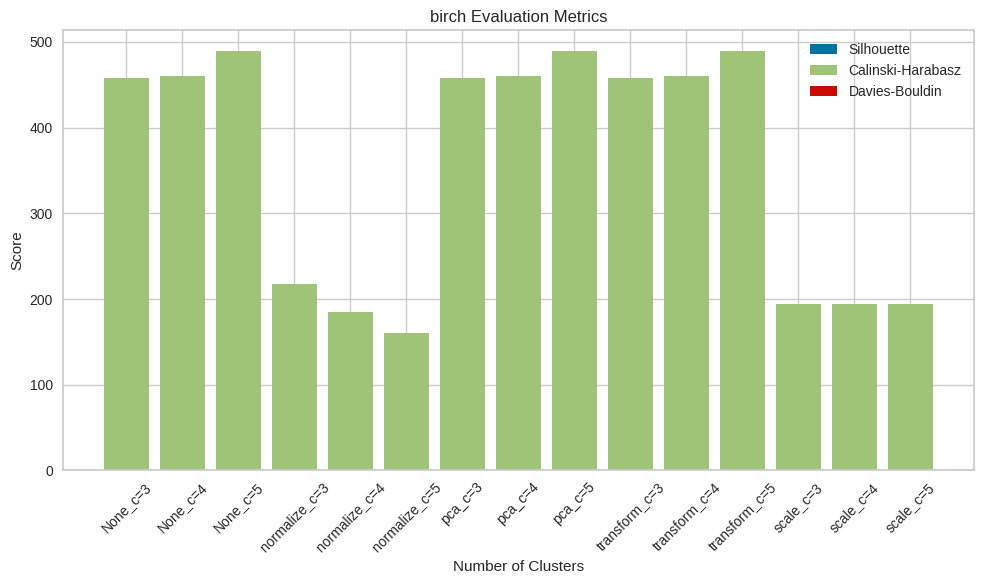

In [24]:
import matplotlib.pyplot as plt

evaluation_metrics = ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']

for algorithm, results in results_dict.items():
    plt.figure(figsize=(10, 6))
    plt.title(f'{algorithm} Evaluation Metrics')
    for metric in evaluation_metrics:
        plt.bar(results.columns, results.loc[metric], label=metric)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()